## CLASSIFY TWEETS BASED ON EMOTION  USING NLP


##


###  IMPORT ALL DEPENDENCIES

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk import FreqDist,word_tokenize

from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional, Dense,Dropout,Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils

from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from os import makedirs


#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip


### Load data

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/watex95/DATA-SCIENCE-PROJECTS/master/text_emotion.csv')

In [0]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


### EXPLORATORY DATA ANALYSIS

In [0]:
len(df['sentiment'].unique())

13

In [0]:
df.shape

(40000, 4)

In [0]:
df.columns

Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')

In [0]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

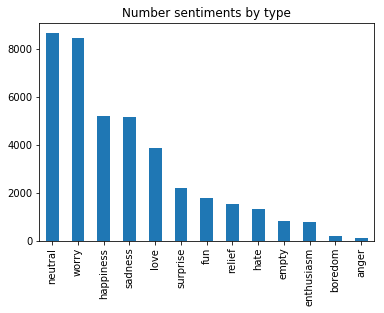

In [0]:
df['sentiment'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Number sentiments by type')

In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
sentimentAnalysis = df.groupby("sentiment")


### WORD CLOUD

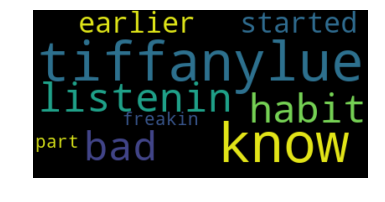

In [0]:
#Start with one review:
text = df.content[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

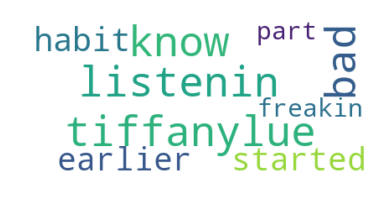

In [0]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

So now you'll combine all tweet content into one big text and create a big fat cloud to see which characteristics are most common sentiment

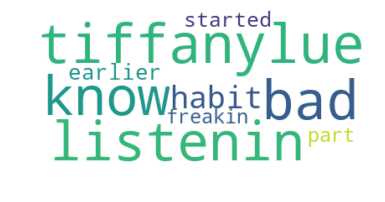

In [0]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["feel", "play", "get", "bore", "wait"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ohhh, it seems like today, work, thank and love are the most mentioned words, and today is the most popular of them all. This aligns with the fact that  the tweeters always uses the word love often.

###   DATA CLEANING
     
   Convert all text to lower case.
    Replace REPLACE_BY_SPACE_RE symbols by space in text.
    Remove symbols that are in BAD_SYMBOLS_RE from text.
    Remove “@” in text.
    Remove stop words.
    Remove digits in text.

In [0]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
       
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['content'] = df['content'].apply(clean_text)
df['content'] = df['content'].str.replace('\d+', '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:

def print_plot(index):
    example = df[df.index == index][['content', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('sentiment:', example[1])

print_plot(100)


first ever dropped call mobile call telstra less charged data even though data pack
sentiment: worry


In [0]:
print_plot(33)

feels strong contractions wants go http plurkcom p widk
sentiment: neutral


In [0]:
from sklearn.preprocessing import LabelEncoder

df['sentiment']=LabelEncoder().fit_transform(df['sentiment'])
df['sentiment'].unique()

array([ 2, 10,  3,  8, 12, 11,  7,  4,  6,  5,  1,  9,  0])

In [0]:
df['sentiment'].value_counts()

8     8638
12    8459
5     5209
10    5165
7     3842
11    2187
4     1776
9     1526
6     1323
2      827
3      759
1      179
0      110
Name: sentiment, dtype: int64

### FEATURE ENGINEERING

In [0]:
X=df['content'].astype(str)
y=df['sentiment'].values

In [0]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,y,test_size=0.3)

In [0]:
X_TRAIN.head()

27259    prempanicker ah thought management fiat fiat o...
3557     twitt yesterday cause busy day ill back tomorr...
28780                               buildstrong found ride
15765                                  really bad sorehead
2400     ajaedandridge ummmlast night dmd said quot goo...
Name: content, dtype: object

In [0]:
X_TRAIN.shape,X_TEST.shape,Y_TRAIN.shape,Y_TEST.shape

((28000,), (12000,), (28000,), (12000,))

In [0]:
Y_TRAIN[:20]

array([11, 12,  8,  6, 12,  7,  8, 10,  2, 12, 12,  8,  8, 12,  8, 12, 11,
        5,  8, 12])

In [0]:
text=' '.join(X_TRAIN)
text=word_tokenize(text)
freq_dist_text=FreqDist(text)
unique_words=len(freq_dist_text)
unique_words

39103

In [0]:
max_len=max([len(s.split(' ')) for s in X_TRAIN])
max_len

26

In [0]:

#clean words and tokenization

X_TRAIN.fillna("fillna")
X_TEST.fillna("fillna")
X_TRAIN = X_TRAIN.str.lower()
X_TEST = X_TEST.str.lower()


tokenizer=Tokenizer(unique_words)
tokenizer.fit_on_texts(list(X_TRAIN))
X_TRAIN=tokenizer.texts_to_sequences(X_TRAIN)
X_TEST=tokenizer.texts_to_sequences(X_TEST)


X_TRAIN=sequence.pad_sequences(X_TRAIN,maxlen=max_len)
X_TEST=sequence.pad_sequences(X_TEST,maxlen=max_len)

Y_TRAIN=pd.get_dummies(Y_TRAIN)
Y_TEST=pd.get_dummies(Y_TEST)

## MODEL DEFINITION AND TRAINING



### MODEL 1 : LSTM (LONG SHORT TERM MEMORY)

### TRAIN TEST SPLIT

In [0]:

#split for LSTM
X_train_lstm, X_test_lstm, Y_train_lstm, Y_test_lstm =train_test_split(X_TRAIN,Y_TRAIN, test_size = 0.10, random_state = 42)
print(X_train_lstm.shape,Y_train_lstm.shape)
print(X_test_lstm.shape,Y_test_lstm.shape)


(25200, 26) (25200, 13)
(2800, 26) (2800, 13)


   
The first layer is the embedded layer that uses 100 length vectors to represent each word.
1.  SpatialDropout1D performs variational dropout in NLP models.
2.   The next layer is the LSTM layer with 100 memory units.
3.   The output layer must create 13 output values, one for each class.
4.     Activation function is softmax for multi-class classification.
5.  Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

  
    

In [0]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [0]:
path = 'content/glove.6B.50d.txt'
#comp = 'jigsaw-toxic-comment-classification-challenge/'
EMBEDDING_FILE=f'{path}/glove.6B.100d.txt'


In [0]:
embed_size = 100 # how big is each word vector
max_features = 18000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = max_len # max number of words in a comment to use

In [0]:


def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open('glove.6B.100d.txt'))



In [0]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


(0.004451992, 0.4081574)

In [0]:
word_index = tokenizer.word_index
#prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.layers import Flatten, Dense

inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(13, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#history=model.fit(X_t, y, batch_size=32, epochs=7, validation_split=0.1)


history = model.fit(X_train_lstm, Y_train_lstm, epochs=5, batch_size=32,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])





Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 22680 samples, validate on 2520 samples
Epoch 1/5
22680/22680 [==============================] - 76s 3ms/step - loss: 0.2549 - acc: 0.9154 - val_loss: 0.2245 - val_acc: 0.9230
Epoch 2/5
22680/22680 [==============================] - 74s 3ms/step - loss: 0.2209 - acc: 0.9233 - val_loss: 0.2169 - val_acc: 0.9233
Epoch 3/5
22680/22680 [==============================] - 75s 3ms/step - loss: 0.2099 - acc: 0.9244 - val_loss: 0.2186 - val_acc: 0.9222


In [0]:

# accr = model.evaluate(test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

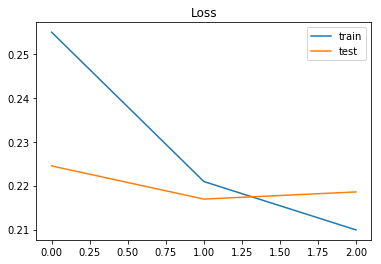

In [0]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

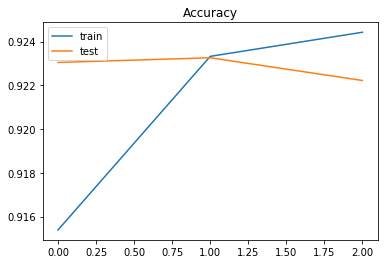

In [0]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

### MODEL EVALUATION: LSTM

In [0]:
score = model.evaluate([X_test_lstm],Y_test_lstm, batch_size=1024, verbose=1)
score

2800/2800 [==============================] - 0s 46us/step


[0.21303025347845894, 0.9234615019389562]

In [0]:
Test_score=model.evaluate([X_TEST],Y_TEST, batch_size=1024, verbose=1)
Test_score

12000/12000 [==============================] - 0s 40us/step


[0.2147639705737432, 0.9227435673077902]

In [144]:
model.save('model1.h5')
print('model saved successfully')

model saved successfully


##MODEL DEPLOYMENT

Our model has an accuracy of 92% in predicting the emotion portrayed in a tweet based on the words used in the tweet.
This is quite significant because for every 100 tweets that are fed into our model it can be able to classify 92 of them correctly.
The model is not perfect enough  therefore i recommend more parameter tuning to be done in order to achieve a higher accuracy and reduce the information loss.
In future improvements of this model we will introduce more advanced word embedding layers to increase the models learning capabilities for better performance.
As per now the model can be loaded and a new dataset can be passed into the model , in our case the X_TEST whereby the model maintains the accuracy of 92%

In [156]:
#Save Model Using Pickle
import pandas
from sklearn import model_selection
import pickle

# save the model to disk
filename = 'model1.h5'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.evaluate(X_TEST, Y_TEST)
print(result)

12000/12000 [==============================] - 16s 1ms/step
[0.21476396930217742, 0.9227435941696167]


The data frame below indicates the probabilities that each tweet will belong to either of the 13 categories of emotion

In [176]:

#prediction
y_hat=model.predict(X_TEST)
pred=pd.DataFrame(y_hat,columns=['anger','boredom','empty','enthusiasm','fun',
                  'happiness','hate','love','neutral','relief','sadness','surprise','worry'])
pred.head()

,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
0,0.003124,0.001233,0.049229,0.011556,0.018784,0.102460,0.005184,0.026366,0.675315,0.022456,0.017734,0.048093,0.087502
1,0.003133,0.001967,0.013063,0.027357,0.080078,0.431523,0.003424,0.085906,0.183579,0.053986,0.021915,0.060036,0.046598
2,0.003121,0.002146,0.046972,0.012151,0.016205,0.049357,0.015053,0.032338,0.475124,0.018615,0.046086,0.052584,0.144653
3,0.004403,0.003204,0.018699,0.022115,0.055097,0.213795,0.006854,0.051652,0.163909,0.080258,0.087772,0.058679,0.191238
4,0.004269,0.003648,0.015788,0.034275,0.106095,0.415226,0.006311,0.123054,0.124905,0.069868,0.040910,0.072342,0.071001


In [178]:
Y_TEST.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
